# Student grade regression

In [2]:
import numpy as np 
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('Data\Student_Performance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_688\2068064417.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv('Data\Student_Performance.csv')


In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## EDA

In [13]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


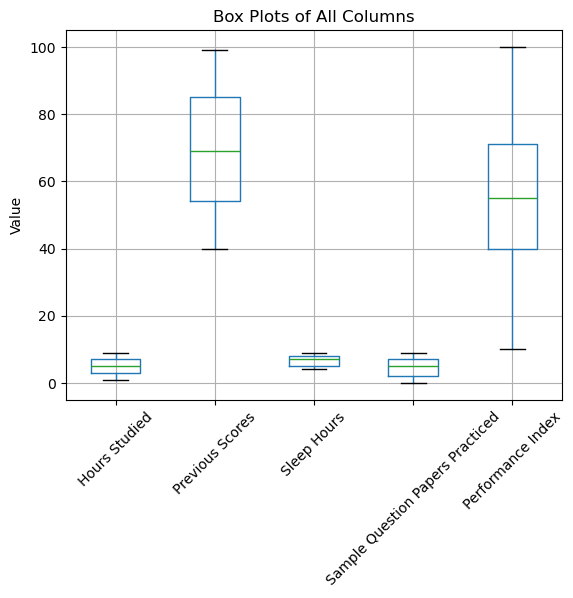

In [12]:
numericData = data.drop(['Extracurricular Activities'], axis=1)
numericData.boxplot()
plt.title('Box Plots of All Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Выбросов в значениях немного. Поэтому для регресси будем использовать MSE.

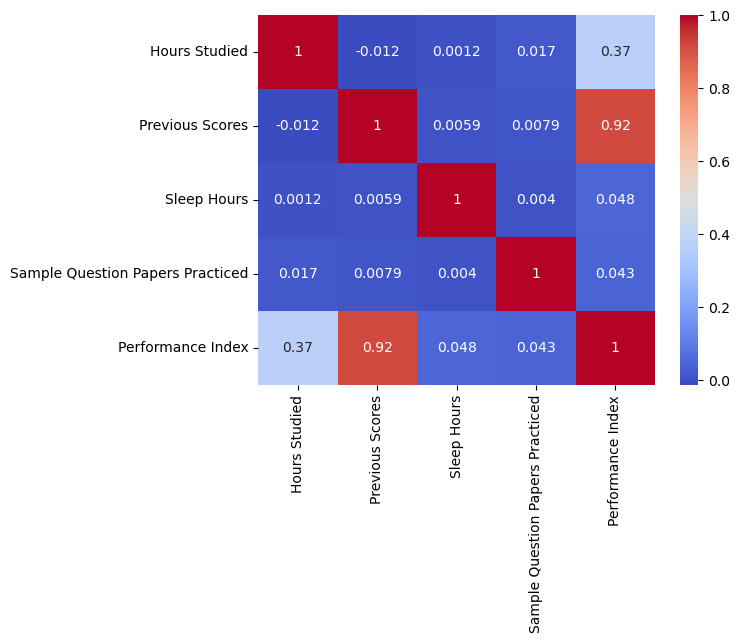

In [20]:
sns.heatmap(numericData.corr(), annot=True, cmap='coolwarm')
plt.show()

Из матрицы корреляций можно сделать следующие выводы:
- самое большое значение имеет результат предыдущего теста
- важный фактор - количество часов, потраченных на учёбу.
- остальные признаки играют минимальную роль